# 1.Import the data and important library

In [1]:
import mglearn
from mglearn import make_blobs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## 1.1 Generate dataset 

In [2]:
X,y = mglearn.datasets.make_forge()

C:\Users\MYLAPTOP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


## 1.2 Plot the dataset

Shape of X:(26, 2), 
Shape of y:(26,)


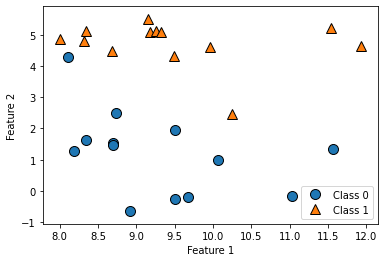

In [3]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
print("Shape of X:{}, \nShape of y:{}".format(X.shape,y.shape))

## 1.3 Plot to see some test prediction with 1 nearest neighbor and 3 nearest neighbor

C:\Users\MYLAPTOP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


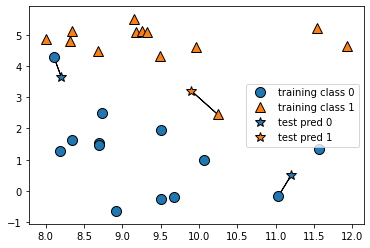

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\MYLAPTOP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


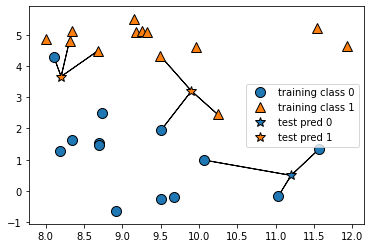

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

# 2. Building K-nearest Neighbors Algorithm using scikit-learn

## 2.1 Split our data into train and test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

## 2.2 Building KNN classification model

In [7]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
print("Test prediction:\n{}".format(clf.predict(X_test)))

Test prediction:
[1 0 1 0 1 0 0]


In [10]:
print("Test prediction score:\n{:.2f}".format(clf.score(X_test, y_test)))

Test prediction score:
0.86


## 2.3 Analyzing the model
### Test set score =0.86 means the model predicts the class correctly for 86% the samples in the test dataset

###  Illustrate the prediction for possible test points to generate decision boundary

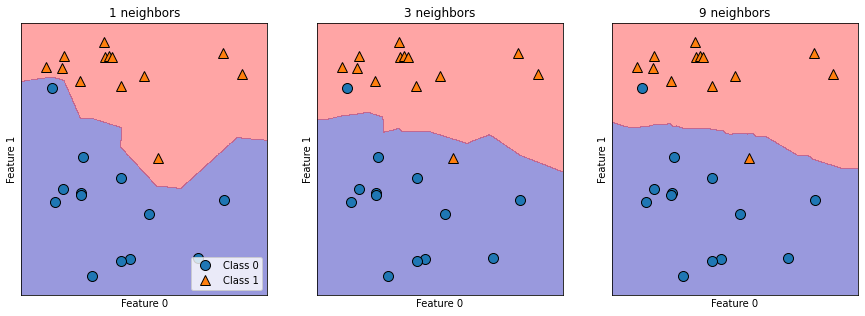

In [11]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
for n, ax in zip ([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbors".format(n))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(["Class 0","Class 1"], loc=4)


## Interpretation: Bigger n-neighbors leads to Smoother Decision Boundery, which means simple model and indicate underfit

[0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571, 0.8571428571428571]


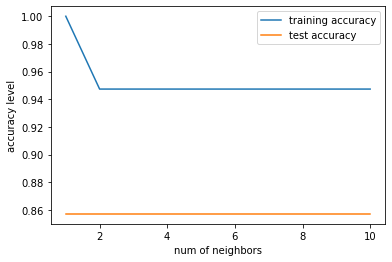

In [17]:
training_accuracy = []
test_accuracy = []
neighbors_setting= range(1,11)

for n_neighbors in neighbors_setting:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_setting, training_accuracy, label="training accuracy")
plt.plot(neighbors_setting, test_accuracy, label="test accuracy")
plt.xlabel("num of neighbors")
plt.ylabel("accuracy level")
plt.legend()